# Dataset utilizado

He utilizado un data set de kaggle, con 4 clases diferentes,  que clasifica y detecta si se encuentra en el cerebro un tumos de tipo: 
1. Glicoma
2. Menigno
3. No tumor
4. Pituitarios

Este dataset se puede encontrar en el siguiente enlace:
https://www.kaggle.com/sartajbhuvaji/brain-tumor-classification-mri

#  Utilizando solo los datos de Trainig y Testing

In [1]:
import tensorflow as tf

image_size = (150, 150)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/brain-tumor-classification-mri/Training",
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/brain-tumor-classification-mri/Testing",
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

Found 2870 files belonging to 4 classes.


2022-01-12 19:49:15.978254: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-12 19:49:16.087505: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-12 19:49:16.088232: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-12 19:49:16.091233: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Found 394 files belonging to 4 classes.


In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Rescaling, Flatten
from tensorflow.keras.callbacks import EarlyStopping

model = keras.Sequential()
model.add(Rescaling(scale=(1./127.5),
                    offset=-1, 
                    input_shape=(150, 150, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])

In [3]:
epochs = 200

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, restore_best_weights=True)

h = model.fit(
        train_ds,
        epochs=epochs, 
        validation_data=val_ds,
        callbacks = [es]
)

Epoch 1/200


2022-01-12 19:49:19.137415: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-01-12 19:49:21.241220: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


90/90 [==============================] - 14s 69ms/step - loss: 1.1105 - accuracy: 0.5362 - val_loss: 2.2459 - val_accuracy: 0.3198
Epoch 2/200
90/90 [==============================] - 5s 53ms/step - loss: 0.6839 - accuracy: 0.7195 - val_loss: 2.0803 - val_accuracy: 0.5381
Epoch 3/200
90/90 [==============================] - 5s 52ms/step - loss: 0.5320 - accuracy: 0.7882 - val_loss: 2.4745 - val_accuracy: 0.5990
Epoch 4/200
90/90 [==============================] - 5s 55ms/step - loss: 0.4565 - accuracy: 0.8195 - val_loss: 3.0216 - val_accuracy: 0.5508
Epoch 5/200
90/90 [==============================] - 5s 51ms/step - loss: 0.3661 - accuracy: 0.8547 - val_loss: 3.0366 - val_accuracy: 0.6523
Epoch 6/200
90/90 [==============================] - 5s 50ms/step - loss: 0.3005 - accuracy: 0.8861 - val_loss: 3.7599 - val_accuracy: 0.6574
Epoch 7/200
90/90 [==============================] - 5s 52ms/step - loss: 0.2636 - accuracy: 0.9003 - val_loss: 3.0385 - val_accuracy: 0.7005
Epoch 8/200
90/90

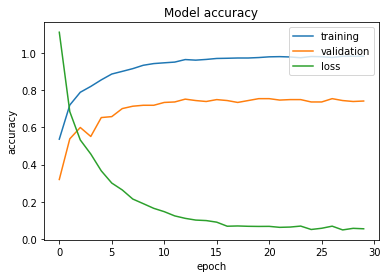

In [4]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show() 

Por muchos cambios efectuados en el modelo, no se ha conseguido acortar la distancia entre trainig y validation, se ha mantenido con una diferencia entre un 20% o 25%.

              precision    recall  f1-score   support

           0     0.2300    1.0000    0.3740        23
           1     0.9913    0.6746    0.8028       169
           2     0.9905    0.7482    0.8525       139
           3     0.7568    0.8889    0.8175        63

    accuracy                         0.7538       394
   macro avg     0.7421    0.8279    0.7117       394
weighted avg     0.9091    0.7538    0.7976       394



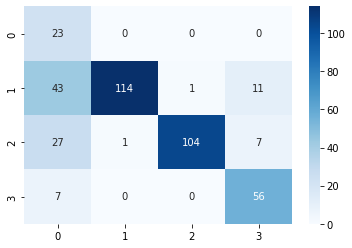

In [5]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

results = np.concatenate([(y, model.predict(x=x)) for x, y in val_ds], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4))

# Utilizando solo los datos de Trainig

Despues de varios intentos de mejorar el acuraccy de los datos que contiene la carpeta de validation, y de buscar informacion de como podemos mejorarlo hemos decididido, que la mejor solución es obviar la carpeta de validacion ya que solo contiene 394 imagenes, y al parecer son pocas imagenes.

In [6]:
import tensorflow as tf

image_size = (150, 150)
batch_size = 32

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/brain-tumor-classification-mri/Training",
    validation_split=0.2,
    subset="training",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "../input/brain-tumor-classification-mri/Training",
    validation_split=0.2,
    subset="validation",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    label_mode='categorical'
)

train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

Found 2870 files belonging to 4 classes.
Using 2296 files for training.
Found 2870 files belonging to 4 classes.
Using 574 files for validation.


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Rescaling, Flatten
from tensorflow.keras.callbacks import EarlyStopping

model = keras.Sequential()
model.add(Rescaling(scale=(1./127.5),
                    offset=-1, 
                    input_shape=(150, 150, 3)))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])

In [8]:
epochs = 200

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, restore_best_weights=True)

h = model.fit(
        train_ds,
        epochs=epochs, 
        validation_data=val_ds,
        callbacks = [es]
)

Epoch 1/200
72/72 [==============================] - 5s 58ms/step - loss: 1.1500 - accuracy: 0.5348 - val_loss: 0.7907 - val_accuracy: 0.6812
Epoch 2/200
72/72 [==============================] - 4s 57ms/step - loss: 0.7126 - accuracy: 0.7099 - val_loss: 0.6265 - val_accuracy: 0.7805
Epoch 3/200
72/72 [==============================] - 4s 53ms/step - loss: 0.5873 - accuracy: 0.7705 - val_loss: 0.4719 - val_accuracy: 0.8136
Epoch 4/200
72/72 [==============================] - 4s 54ms/step - loss: 0.4899 - accuracy: 0.8031 - val_loss: 0.4398 - val_accuracy: 0.8328
Epoch 5/200
72/72 [==============================] - 5s 63ms/step - loss: 0.4045 - accuracy: 0.8367 - val_loss: 0.4758 - val_accuracy: 0.8188
Epoch 6/200
72/72 [==============================] - 4s 53ms/step - loss: 0.3642 - accuracy: 0.8645 - val_loss: 0.3540 - val_accuracy: 0.8693
Epoch 7/200
72/72 [==============================] - 5s 62ms/step - loss: 0.2556 - accuracy: 0.9011 - val_loss: 0.3541 - val_accuracy: 0.8693
Epoch 

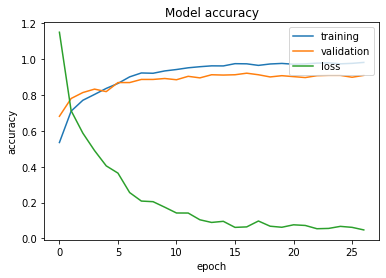

In [9]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show() 

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Rescaling, Flatten
from tensorflow.keras.callbacks import EarlyStopping

model = keras.Sequential()
model.add(Rescaling(scale=(1./127.5),
                    offset=-1, 
                    input_shape=(150, 150, 3)))
model.add(Conv2D(25, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(50, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(100, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(loss=tf.keras.losses.categorical_crossentropy,
              optimizer=tf.keras.optimizers.Adam(1e-3),
              metrics=['accuracy'])

In [11]:
epochs = 60

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10, restore_best_weights=True)

h = model.fit(
        train_ds,
        epochs=epochs, 
        validation_data=val_ds,
        callbacks = [es]
)

Epoch 1/60
72/72 [==============================] - 5s 56ms/step - loss: 1.2159 - accuracy: 0.4686 - val_loss: 0.7844 - val_accuracy: 0.7038
Epoch 2/60
72/72 [==============================] - 4s 57ms/step - loss: 0.8520 - accuracy: 0.6302 - val_loss: 0.6363 - val_accuracy: 0.7526
Epoch 3/60
72/72 [==============================] - 4s 52ms/step - loss: 0.7642 - accuracy: 0.6699 - val_loss: 0.5840 - val_accuracy: 0.7822
Epoch 4/60
72/72 [==============================] - 5s 63ms/step - loss: 0.6628 - accuracy: 0.7034 - val_loss: 0.5362 - val_accuracy: 0.7857
Epoch 5/60
72/72 [==============================] - 4s 54ms/step - loss: 0.5897 - accuracy: 0.7591 - val_loss: 0.4768 - val_accuracy: 0.8188
Epoch 6/60
72/72 [==============================] - 4s 57ms/step - loss: 0.5378 - accuracy: 0.7657 - val_loss: 0.4767 - val_accuracy: 0.7770
Epoch 7/60
72/72 [==============================] - 4s 53ms/step - loss: 0.4612 - accuracy: 0.8092 - val_loss: 0.3845 - val_accuracy: 0.8310
Epoch 8/60
72

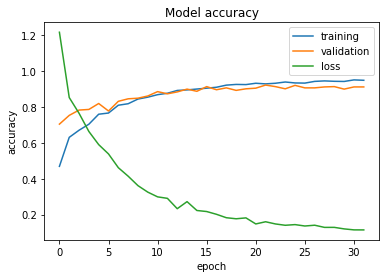

In [12]:
import matplotlib.pyplot as plt

plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.plot(h.history['loss'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation','loss'], loc='upper right')
plt.show() 

              precision    recall  f1-score   support

           0     0.9051    0.9470    0.9256       151
           1     0.8704    0.8758    0.8731       161
           2     0.9277    0.8652    0.8953        89
           3     0.9825    0.9711    0.9767       173

    accuracy                         0.9216       574
   macro avg     0.9214    0.9148    0.9177       574
weighted avg     0.9222    0.9216    0.9216       574



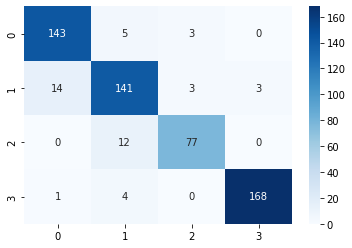

In [13]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

results = np.concatenate([(y, model.predict(x=x)) for x, y in val_ds], axis=1)

predictions = np.argmax(results[0], axis=1)
labels = np.argmax(results[1], axis=1)

cf_matrix = confusion_matrix(labels, predictions)

sns.heatmap(cf_matrix, annot=True, fmt="d", cmap="Blues")

print(classification_report(labels, predictions, digits = 4))